<a href="https://colab.research.google.com/github/souzajvp/teaching-python/blob/main/Aula08/Agrupando_e_filtrando_dados_no_pandas_Aula08-respostas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agrupando e filtrando dados com o pandas
A capacidade de manipular, agrupar ou filtrar dados de acordo com alguma caractéristca pode ser muito útil.

Desta forma, hoje vamos aprender como usar o pandas para fazer tudo isso!

Carregando os dados de TB do SINAN

In [1]:
import pandas as pd 

In [2]:
url = "https://raw.githubusercontent.com/souzajvp/teaching-python/main/dataset/tb_pr_sinan.csv"
dados = pd.read_csv(url)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Agrupando dados com o método `.groupby()`
O método `.groupby()` permite que especifiquemos uma ou mais características para agrupar nossos dados.

Como exemplo, vamos agrupar nosso dados pela variável `CS_SEXO`.

In [3]:
dados.groupby('CS_SEXO')

Na verdade, precisamos especificar algumas coisas quando executamos o `.groupby()`. Por exemplo, podemos usar `.groupby().mean()` para obter a média de todas as variáveis agrupadas.

In [4]:
dados.groupby('CS_SEXO').mean()

,NU_NOTIFIC,TP_NOT,DT_NOTIFIC,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_DIAG,DT_NASC,NU_IDADE_N,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,CS_ZONA,ID_PAIS,NDUPLIC_N,IN_VINCULA,DT_DIGITA,DT_TRANSUS,DT_TRANSDM,DT_TRANSSM,DT_TRANSRM,DT_TRANSRS,DT_TRANSSE,IDENT_MICR,MIGRADO_W,ID_OCUPA_N,TRATAMENTO,INSTITUCIO,RAIOX_TORA,TESTE_TUBE,FORMA,EXTRAPU1_N,EXTRAPU2_N,AGRAVAIDS,AGRAVALCOO,AGRAVDIABE,...,PIRAZINAMI,ETIONAMIDA,OUTRAS,TRAT_SUPER,NU_CONTATO,DOENCA_TRA,SG_UF_AT,ID_MUNIC_A,NU_NOTI_AT,DT_NOTI_AT,SG_UF_2,ID_MUNIC_2,BACILOSC_1,BACILOSC_2,BACILOSC_3,BACILOSC_4,BACILOSC_5,BACILOSC_6,TRATSUP_AT,DT_MUDANCA,NU_COMU_EX,SITUA_9_M,SITUA_12_M,SITUA_ENCE,DT_ENCERRA,TPUNINOT,POP_LIBER,POP_RUA,POP_SAUDE,POP_IMIG,BENEF_GOV,AGRAVDROGA,AGRAVTABAC,TEST_MOLEC,TEST_SENSI,ANT_RETRO,BAC_APOS_6,TRANSF,UF_TRANSF,MUN_TRANSF
CS_SEXO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F,2.484622e+06,2.0,2.009750e+07,2009.683814,40.995935,411189.811741,1362.182444,2.009710e+07,1.970664e+07,4032.348927,6.543799,1.991737,4.397847,41.0,411223.203903,1361.632924,1.104160,1.060982,0.187661,0.281575,1.981897e+07,1.930305e+07,1.958002e+07,1.999665e+07,NaN,1.899220e+07,2.004155e+07,1.524150e+10,1.000000,809976.270315,1.354963,1.320417,1.435569,3.474433,1.234416,4.085202,7.506887,3.644800,3.646097,3.642635,...,1.035063,1.983814,1.984030,2.511344,3.214660,2.858707,40.995926,411200.979631,2.505021e+06,2.009779e+07,40.995969,411210.476315,2.267196,2.569236,2.750985,2.721756,2.809595,2.670527,1.420431,1.977786e+07,2.848764,1.980107,1.685106,1.652328,2.009239e+07,4.664936,2.017766,2.006435,1.996973,2.025728,2.410305,2.038582,1.961595,3.940492,5.832225,1.699013,3.201624,2.179954,40.306011,40.361345
I,8.377846e+05,2.0,2.002322e+07,2002.250000,41.000000,411287.500000,1363.791667,2.002243e+07,1.963104e+07,4038.750000,6.125000,1.400000,3.000000,41.0,411142.083333,1363.791667,1.304348,1.000000,0.000000,0.000000,1.904076e+07,1.904308e+07,1.909204e+07,1.993281e+07,NaN,1.899123e+07,1.993451e+07,0.000000e+00,1.000000,999993.000000,1.291667,2.000000,1.260870,3.782609,1.000000,9.000000,9.000000,5.250000,5.250000,5.000000,...,1.083333,2.000000,2.000000,6.250000,2.000000,3.166667,41.000000,411287.500000,8.377846e+05,2.002322e+07,41.000000,411142.083333,1.000000,2.000000,3.000000,2.500000,1.000000,2.333333,1.000000,1.962894e+07,1.500000,1.863636,1.000000,1.541667,2.002941e+07,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
M,2.602720e+06,2.0,2.010313e+07,2010.246002,40.997485,411238.305449,1362.335567,2.010273e+07,1.969018e+07,4035.145769,6.000000,2.031743,4.096144,41.0,411249.456380,1362.227504,1.134885,1.055032,0.237412,0.341615,1.985915e+07,1.938626e+07,1.955091e+07,2.001643e+07,18991230.0,1.899215e+07,2.004611e+07,1.676868e+10,1.000633,744631.881826,1.421558,1.429355,1.376298,3.552941,1.204301,3.980392,7.439124,3.362335,3.123894,3.366048,...,1.031010,1.984960,1.983592,2.388105,3.430278,2.928723,40.997196,411251.224881,2.609966e+06,2.010351e+07,40.995947,411236.581996,2.146863,2.489800,2.675981,2.665861,2.736493,2.619184,1.355099,1.978580e+07,2.984728,2.104407,1.833713,1.814146,2.009420e+07,5.472649,1.928684,1.996935,2.046305,2.048301,2.490205,2.017805,1.852615,3.675752,5.637059,1.725517,3.074828,2.171769,40.373016,40.392457


Aparentemente, não temos uma saída muito útil nesse caso. Isso se da pois nossos dados estão codificados e não faz muito sentido calcular a média do código de `CS_RACA`, por exemplo.

Como cada linha do nosso banco representa um paciente, poderíamos usar o método `.groupby().count()` para obter uma contagem dos pacientes de cada sexo.

In [5]:
dados.groupby('CS_SEXO').count()

,NU_NOTIFIC,TP_NOT,ID_AGRAVO,DT_NOTIFIC,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_DIAG,DT_NASC,NU_IDADE_N,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,CS_ZONA,ID_PAIS,NDUPLIC_N,IN_VINCULA,DT_DIGITA,DT_TRANSUS,DT_TRANSDM,DT_TRANSSM,DT_TRANSRM,DT_TRANSRS,DT_TRANSSE,IDENT_MICR,MIGRADO_W,ID_OCUPA_N,TRATAMENTO,INSTITUCIO,RAIOX_TORA,TESTE_TUBE,FORMA,EXTRAPU1_N,EXTRAPU2_N,EXTRAPUL_O,AGRAVAIDS,...,ETIONAMIDA,OUTRAS,OUTRAS_DES,TRAT_SUPER,NU_CONTATO,DOENCA_TRA,SG_UF_AT,ID_MUNIC_A,NU_NOTI_AT,DT_NOTI_AT,SG_UF_2,ID_MUNIC_2,BACILOSC_1,BACILOSC_2,BACILOSC_3,BACILOSC_4,BACILOSC_5,BACILOSC_6,TRATSUP_AT,DT_MUDANCA,NU_COMU_EX,SITUA_9_M,SITUA_12_M,SITUA_ENCE,DT_ENCERRA,TPUNINOT,POP_LIBER,POP_RUA,POP_SAUDE,POP_IMIG,BENEF_GOV,AGRAVDROGA,AGRAVTABAC,TEST_MOLEC,TEST_SENSI,ANT_RETRO,BAC_APOS_6,TRANSF,UF_TRANSF,MUN_TRANSF
CS_SEXO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F,18448,18448,18448,18448,18448,18448,18448,18444,18448,18405,18448,18448,16580,17929,18448,18445,18424,17982,18448,7391,8559,16394,5941,7357,14172,0,4535,8022,12491,6636,5464,18416,7484,18291,13357,18416,4014,363,259,16143,...,13283,12711,168,13576,12401,11324,18410,18410,18409,18409,18360,18303,11093,15700,10401,15012,10005,14681,12109,878,14441,11813,235,17830,17863,12714,5291,5284,5286,5286,5240,5417,5416,5159,1955,1216,2832,439,366,357
I,24,24,24,24,24,24,24,24,24,24,24,24,5,20,24,24,24,23,24,23,23,22,21,22,23,0,21,22,2,23,1,24,1,23,23,24,2,2,0,4,...,24,24,0,24,1,12,24,24,24,24,24,24,1,18,1,18,1,18,1,5,8,22,1,24,24,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0
M,38959,38959,38959,38959,38959,38959,38959,38946,38959,38830,38959,38959,35472,37735,38959,38950,38896,37810,38959,14776,17549,35014,12195,13642,30234,1,8575,16126,27644,12633,10603,38882,15684,38605,26690,38879,7038,731,441,33872,...,26596,25415,323,27155,27538,22644,38867,38865,38864,38864,38736,38581,24390,32401,22366,30634,21229,29576,26556,1679,30514,23552,439,37508,37573,28006,12746,12725,12720,12712,12660,12918,12905,12401,5100,2951,5653,1176,1008,981


Assim, temos então o número de vezes que cada variável aparece no banco de acordo com o sexo....

**Que tal tentarmos agrupar por ano?**

In [6]:
dados.groupby('NU_ANO').count()

,NU_NOTIFIC,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_DIAG,DT_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,CS_ZONA,ID_PAIS,NDUPLIC_N,IN_VINCULA,DT_DIGITA,DT_TRANSUS,DT_TRANSDM,DT_TRANSSM,DT_TRANSRM,DT_TRANSRS,DT_TRANSSE,IDENT_MICR,MIGRADO_W,ID_OCUPA_N,TRATAMENTO,INSTITUCIO,RAIOX_TORA,TESTE_TUBE,FORMA,EXTRAPU1_N,EXTRAPU2_N,EXTRAPUL_O,AGRAVAIDS,...,ETIONAMIDA,OUTRAS,OUTRAS_DES,TRAT_SUPER,NU_CONTATO,DOENCA_TRA,SG_UF_AT,ID_MUNIC_A,NU_NOTI_AT,DT_NOTI_AT,SG_UF_2,ID_MUNIC_2,BACILOSC_1,BACILOSC_2,BACILOSC_3,BACILOSC_4,BACILOSC_5,BACILOSC_6,TRATSUP_AT,DT_MUDANCA,NU_COMU_EX,SITUA_9_M,SITUA_12_M,SITUA_ENCE,DT_ENCERRA,TPUNINOT,POP_LIBER,POP_RUA,POP_SAUDE,POP_IMIG,BENEF_GOV,AGRAVDROGA,AGRAVTABAC,TEST_MOLEC,TEST_SENSI,ANT_RETRO,BAC_APOS_6,TRANSF,UF_TRANSF,MUN_TRANSF
NU_ANO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001,3138,3138,3138,3138,3138,3138,3137,3138,3124,3138,3138,3138,612,3000,3138,3138,3137,3007,3138,3115,3132,3138,3138,3138,3138,0,3138,3138,0,3132,47,3122,103,3107,3044,3122,635,92,0,1180,...,3036,2869,2,3122,102,969,3122,3122,3122,3122,3122,3116,56,2615,56,2467,55,2487,89,161,902,2876,75,3085,3138,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2002,3296,3296,3296,3296,3296,3296,3295,3296,3280,3296,3296,3296,842,3191,3296,3296,3295,3151,3296,3249,3293,3296,3296,3296,3296,0,3296,3296,0,3293,31,3280,93,3262,3216,3280,685,95,1,1396,...,3207,3056,6,3280,91,1555,3280,3280,3280,3280,3280,3274,45,2741,46,2616,45,2654,85,238,1366,2884,95,3237,3296,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2003,3419,3419,3419,3419,3419,3419,3418,3419,3398,3419,3419,3419,3308,3334,3419,3419,3418,3323,3419,3357,3413,3419,3419,3419,3419,0,3419,3419,0,3410,29,3398,127,3380,3339,3398,822,204,2,2426,...,3305,3083,47,3398,126,3298,3398,3398,3398,3398,3397,3391,67,2830,68,2712,68,2701,114,265,2138,2679,110,3365,3419,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2004,3266,3266,3266,3266,3266,3266,3265,3266,3248,3266,3266,3266,3209,3204,3266,3266,3265,3194,3266,3196,3256,3266,3266,3266,3266,0,3266,3266,0,3256,52,3214,187,3194,3183,3214,805,290,1,2317,...,3126,2967,57,3214,202,3207,3214,3214,3214,3214,3214,3203,88,2741,82,2608,79,2523,174,223,2112,2404,111,3183,3266,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2005,3350,3350,3350,3350,3350,3350,3350,3350,3329,3350,3350,3350,3310,3277,3350,3350,3350,3276,3350,3231,3313,44,347,689,2210,0,1,2656,0,3306,110,3346,287,3332,3313,3346,712,154,3,2449,...,3282,3102,55,3346,309,3319,3347,3347,3347,3347,3344,3344,426,2834,377,2744,351,2663,318,863,2172,2648,47,3290,3296,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2006,2952,2952,2952,2952,2952,2952,2950,2952,2943,2952,2952,2952,2910,2874,2952,2952,2949,2858,2952,2824,2906,257,400,661,2128,0,1,1838,2159,2894,469,2952,1038,2937,2912,2952,508,40,6,2497,...,2897,2751,47,2952,1335,2932,2952,2952,2952,2952,2950,2947,1579,2701,1543,2625,1507,2564,1712,305,2212,2691,26,2944,2943,2745,39,39,39,38,39,43,43,33,13,7,67,19,15,15
2007,2981,2981,2981,2981,2981,2981,2981,2981,2973,2981,2981,2981,2970,2927,2981,2981,2980,2935,2981,276,441,2981,514,571,2248,0,1,1430,2981,0,1894,2981,2955,2966,2946,2981,576,46,51,2943,...,2944,2870,42,2980,2981,2972,2981,2981,2981,2981,2979,2954,2732,2697,2608,2617,2543,2573,2980,83,2526,2872,22,2981,2974,2981,13,13,13,13,13,16,15,10,2,3,24,8,6,6
2008,2972,2972,2972,2972,2972,2972,2971,2972,2970,2972,2972,2972,2964,2897,2972,2971,2967,2931,2972,303,448,2972,424,560,2246,0,4,1279,2970,0,2043,2972,2955,2944,2919,2972,568,37,45,2947,...,2933,2839,29,2972,2972,2955,2971,2971,2969,2969,2961,2933,2728,2644,2572,2558,2507,2519,2971,92,2529,2824,25,2968,2968,2970,23,23,23,23,22,27,27,21,14,9,30,15,9,9
2009,2807,2807,2807,2807,2807,2807,2807,2807,2806,2807,2807,2807,2797,2735,2807,2802,2800,2753,2807,274,485,2807,328,525,2053,0,0,647,2803,0,1868,2807,2791,2794,2771,2807,524,32,53,2790,...,2766,2705,35,2807,2806,2790,2807,2807,2807,2807,2788,2785,2557,2471,2377,2355,2287,2297,2800,64,2465,2702,32,2805,2804,2803,12,12,12,12,11,13,13,13,7,7,26,12,8,7


Assim, conseguimos transformar um banco de dados que estava separado à nivel de paciente, para dados separados por ano.

**Que tal um gráfico dos casos?**

In [7]:
import matplotlib.pyplot as plt

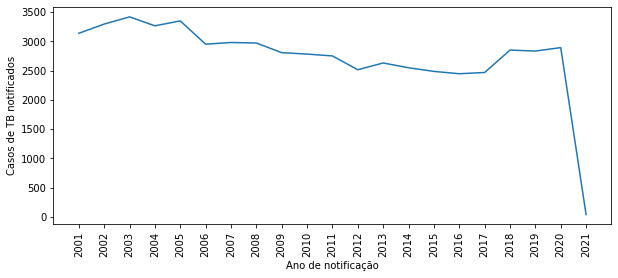

In [9]:
dados_ano = dados.groupby('NU_ANO').count()

plt.figure(figsize=(10,4))
plt.plot(dados_ano.index, dados_ano['NU_NOTIFIC'])
plt.ylabel('Casos de TB notificados')
plt.xlabel('Ano de notificação')
plt.xticks(dados_ano.index, rotation=90)
plt.show()

**Mas e quanto aos casos separados por sexo?**

Podemos usar o `groupby()` com várias variáveis ao mesmo tempo!

**Obs:** usar o `.reset_index()` ajuda bastante nesse caso!

In [10]:
dados.groupby(['CS_SEXO', 'NU_ANO']).count().reset_index()

,CS_SEXO,NU_ANO,NU_NOTIFIC,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_DIAG,DT_NASC,NU_IDADE_N,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,CS_ZONA,ID_PAIS,NDUPLIC_N,IN_VINCULA,DT_DIGITA,DT_TRANSUS,DT_TRANSDM,DT_TRANSSM,DT_TRANSRM,DT_TRANSRS,DT_TRANSSE,IDENT_MICR,MIGRADO_W,ID_OCUPA_N,TRATAMENTO,INSTITUCIO,RAIOX_TORA,TESTE_TUBE,FORMA,EXTRAPU1_N,EXTRAPU2_N,EXTRAPUL_O,...,ETIONAMIDA,OUTRAS,OUTRAS_DES,TRAT_SUPER,NU_CONTATO,DOENCA_TRA,SG_UF_AT,ID_MUNIC_A,NU_NOTI_AT,DT_NOTI_AT,SG_UF_2,ID_MUNIC_2,BACILOSC_1,BACILOSC_2,BACILOSC_3,BACILOSC_4,BACILOSC_5,BACILOSC_6,TRATSUP_AT,DT_MUDANCA,NU_COMU_EX,SITUA_9_M,SITUA_12_M,SITUA_ENCE,DT_ENCERRA,TPUNINOT,POP_LIBER,POP_RUA,POP_SAUDE,POP_IMIG,BENEF_GOV,AGRAVDROGA,AGRAVTABAC,TEST_MOLEC,TEST_SENSI,ANT_RETRO,BAC_APOS_6,TRANSF,UF_TRANSF,MUN_TRANSF
0,F,2001,1078,1078,1078,1078,1078,1078,1077,1078,1075,1078,1078,211,1038,1078,1078,1077,1033,1078,1072,1076,1078,1078,1078,1078,0,1078,1078,0,1076,17,1072,35,1066,1048,1072,242,43,0,...,1048,996,0,1072,34,350,1072,1072,1072,1072,1072,1069,16,914,16,866,15,864,29,48,307,989,38,1060,1078,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,F,2002,1161,1161,1161,1161,1161,1161,1161,1161,1159,1161,1161,280,1129,1161,1161,1161,1115,1161,1145,1161,1161,1161,1161,1161,0,1161,1161,0,1161,9,1157,27,1150,1136,1157,253,29,0,...,1133,1092,1,1157,28,542,1157,1157,1157,1157,1157,1155,7,980,6,943,6,960,25,89,489,1027,31,1143,1161,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,F,2003,1192,1192,1192,1192,1192,1192,1192,1192,1190,1192,1192,1142,1159,1192,1192,1192,1156,1192,1169,1190,1192,1192,1192,1192,0,1192,1192,0,1189,13,1183,41,1175,1171,1183,307,71,0,...,1152,1075,14,1183,43,1147,1183,1183,1183,1183,1183,1182,23,996,23,953,23,955,37,98,746,933,41,1171,1192,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,F,2004,1100,1100,1100,1100,1100,1100,1100,1100,1096,1100,1100,1086,1084,1100,1100,1100,1074,1100,1079,1096,1100,1100,1100,1100,0,1100,1100,0,1096,14,1088,64,1082,1074,1088,300,87,1,...,1051,995,21,1088,65,1079,1088,1088,1088,1088,1088,1083,29,927,27,887,25,876,59,75,710,830,37,1074,1100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,F,2005,1138,1138,1138,1138,1138,1138,1138,1138,1131,1138,1138,1127,1112,1138,1138,1138,1110,1138,1098,1124,17,91,261,756,0,1,912,0,1121,51,1137,97,1133,1125,1137,263,54,1,...,1118,1054,19,1138,101,1128,1138,1138,1138,1138,1137,1137,146,970,129,939,125,919,116,282,771,895,14,1120,1121,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,F,2006,1017,1017,1017,1017,1017,1017,1017,1017,1014,1017,1017,999,985,1017,1017,1015,986,1017,979,1000,84,114,247,719,0,1,656,738,993,153,1017,335,1013,1006,1017,192,12,2,...,996,958,18,1017,437,1010,1017,1017,1017,1017,1016,1014,523,935,511,910,497,884,579,96,770,920,7,1013,1013,961,12,12,12,12,12,13,13,12,4,2,28,6,5,5
6,F,2007,964,964,964,964,964,964,964,964,962,964,964,962,942,964,964,963,950,964,76,132,964,135,209,711,0,0,441,964,0,674,964,955,961,950,964,194,16,18,...,951,923,16,964,964,961,964,964,964,964,964,956,885,881,856,858,838,849,964,29,832,931,8,964,963,964,2,2,2,2,2,4,3,2,1,1,6,3,2,2
7,F,2008,964,964,964,964,964,964,964,964,964,964,964,963,939,964,964,964,949,964,87,122,964,132,192,712,0,1,426,964,0,714,964,960,956,948,964,195,11,13,...,952,920,15,964,964,959,964,964,963,963,960,957,889,866,840,840,823,832,964,31,831,922,6,963,964,964,4,4,4,4,4,5,5,3,3,3,8,1,1,1
8,F,2009,881,881,881,881,881,881,881,881,881,881,881,880,866,881,880,879,868,881,67,138,881,95,180,634,0,0,200,880,0,632,881,877,877,873,881,187,14,18,...,865,849,11,881,881,877,881,881,881,881,877,876,794,770,739,739,715,725,880,24,779,855,8,881,881,880,5,5,5,5,5,5,5,5,3,3,13,3,3,3
9,F,2010,959,959,959,959,959,959,959,959,959,959,959,957,928,959,959,957,941,959,94,149,959,89,176,697,0,0,73,958,0,711,959,949,955,936,959,179,4,13,...,938,911,18,956,959,953,959,959,959,959,958,956,893,874,855,836,825,806,957,27,840,912,13,959,957,958,12,12,12,12,13,47,46,14,1,3,24,1,1,1


In [11]:
dados_sexo_ano = dados.groupby(['CS_SEXO', 'NU_ANO']).count().reset_index()

In [12]:
import seaborn as sns

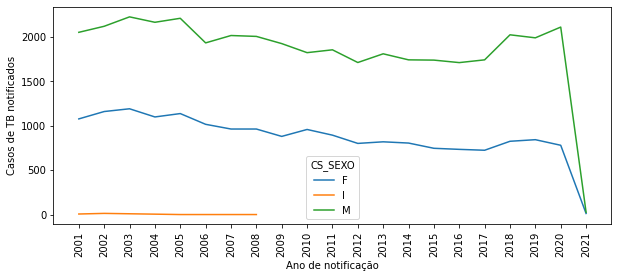

In [13]:
plt.figure(figsize=(10,4))
sns.lineplot(data=dados_sexo_ano, x='NU_ANO', y='NU_NOTIFIC',
             hue='CS_SEXO')
plt.ylabel('Casos de TB notificados')
plt.xlabel('Ano de notificação')
plt.xticks(dados_ano.index, rotation=90)
plt.show()



É possível comparamos o sexos e os totais?

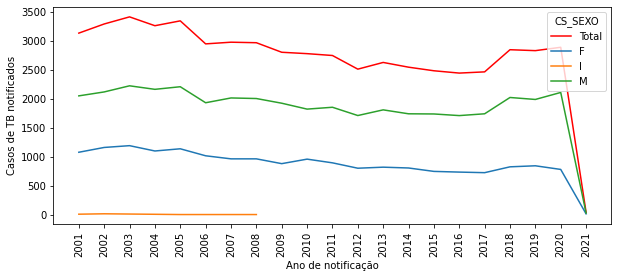

In [19]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dados_ano.index, dados_ano['NU_NOTIFIC'], 'r-', label='Total')

sns.lineplot(data=dados_sexo_ano, x='NU_ANO', y='NU_NOTIFIC',
             hue='CS_SEXO', ax=ax)
ax.set_ylabel('Casos de TB notificados')
ax.set_xlabel('Ano de notificação')
ax.set_xticks(dados_ano.index)
ax.set_xticklabels(dados_ano.index, rotation=90)

plt.show()



# Filtrando os dados com o método `.query()`

O método `.query()` permite que filtremos o banco de dados de acordo com condições específicas.

Seguindo, o exemplo que usamos, podemos agrupar por `CS_SEXO`.

In [22]:
dados.query("CS_SEXO == 'M'")

,NU_NOTIFIC,TP_NOT,ID_AGRAVO,DT_NOTIFIC,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_DIAG,DT_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,CS_ZONA,ID_PAIS,NDUPLIC_N,IN_VINCULA,DT_DIGITA,DT_TRANSUS,DT_TRANSDM,DT_TRANSSM,DT_TRANSRM,DT_TRANSRS,DT_TRANSSE,IDENT_MICR,MIGRADO_W,ID_OCUPA_N,TRATAMENTO,INSTITUCIO,RAIOX_TORA,TESTE_TUBE,FORMA,EXTRAPU1_N,EXTRAPU2_N,EXTRAPUL_O,...,ETIONAMIDA,OUTRAS,OUTRAS_DES,TRAT_SUPER,NU_CONTATO,DOENCA_TRA,SG_UF_AT,ID_MUNIC_A,NU_NOTI_AT,DT_NOTI_AT,SG_UF_2,ID_MUNIC_2,BACILOSC_1,BACILOSC_2,BACILOSC_3,BACILOSC_4,BACILOSC_5,BACILOSC_6,TRATSUP_AT,DT_MUDANCA,NU_COMU_EX,SITUA_9_M,SITUA_12_M,SITUA_ENCE,DT_ENCERRA,TPUNINOT,POP_LIBER,POP_RUA,POP_SAUDE,POP_IMIG,BENEF_GOV,AGRAVDROGA,AGRAVTABAC,TEST_MOLEC,TEST_SENSI,ANT_RETRO,BAC_APOS_6,TRANSF,UF_TRANSF,MUN_TRANSF
4,766013,2,A169,20010216,2001,41,410690.0,1356.0,20010216,19600312.0,4040.0,M,6.0,1.0,3.0,41.0,410690.0,1356.0,1.0,1.0,0.0,0.0,18991230.0,18991230.0,20080125.0,18991230.0,NaN,18991230.0,20080806.0,NaN,1.0,NaN,3.0,1.0,1.0,4.0,1.0,NaN,NaN,NaN,...,2.0,2.0,NaN,9.0,0.0,2.0,41.0,410690.0,766013.0,20010216.0,41.0,410690.0,NaN,3.0,NaN,2.0,NaN,2.0,2.0,NaN,0.0,1.0,NaN,1.0,20010928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,501159,2,A169,20010209,2001,41,411710.0,1368.0,20010209,19670507.0,4033.0,M,6.0,NaN,5.0,41.0,411710.0,1368.0,1.0,1.0,0.0,0.0,18991230.0,18991230.0,18991230.0,20071219.0,NaN,18991230.0,20080806.0,NaN,1.0,NaN,1.0,NaN,2.0,4.0,2.0,3.0,NaN,NaN,...,2.0,2.0,NaN,9.0,NaN,NaN,41.0,411710.0,501159.0,20010209.0,41.0,411710.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,20020312.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,197198,2,A169,20010216,2001,41,411370.0,1371.0,20010216,19430911.0,4057.0,M,6.0,NaN,3.0,41.0,412770.0,1371.0,1.0,1.0,1.0,0.0,18991230.0,18991230.0,18991230.0,20080107.0,NaN,18991230.0,20080815.0,NaN,1.0,NaN,1.0,NaN,1.0,4.0,1.0,NaN,NaN,NaN,...,2.0,2.0,NaN,9.0,NaN,NaN,41.0,411370.0,197198.0,20010216.0,41.0,412770.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,20020123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,167926,2,A169,20010228,2001,41,411060.0,1366.0,20010221,19261005.0,4074.0,M,6.0,NaN,9.0,41.0,411060.0,1366.0,1.0,1.0,0.0,0.0,18991230.0,18991230.0,18991230.0,20070920.0,NaN,18991230.0,20080815.0,NaN,1.0,NaN,1.0,NaN,1.0,4.0,1.0,NaN,NaN,NaN,...,2.0,2.0,NaN,9.0,NaN,NaN,41.0,411060.0,167926.0,20010228.0,41.0,411060.0,NaN,3.0,NaN,3.0,NaN,3.0,NaN,NaN,NaN,4.0,NaN,4.0,20010228.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,335523,2,A169,20010111,2001,41,410150.0,1370.0,20010111,19621122.0,4038.0,M,6.0,NaN,3.0,41.0,412340.0,1370.0,1.0,1.0,0.0,1.0,18991230.0,18991230.0,18991230.0,20071211.0,NaN,18991230.0,20080806.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20011025.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57426,6307302,2,A169,20201230,2020,41,410830.0,1363.0,20201230,19950904.0,4025.0,M,6.0,4.0,3.0,41.0,410830.0,1363.0,1.0,1.0,NaN,NaN,20210112.0,NaN,NaN,NaN,NaN,NaN,NaN,4.108300e+10,NaN,NaN,5.0,NaN,4.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,41.0,410830.0,6307302.0,20201230.0,41.0,410830.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
57427,5741793,2,A169,20201230,2020,41,410690.0,1356.0,20201230,19850329.0,4035.0,M,6.0,1.0,9.0,41.0,410690.0,1356.0,1.0,1.0,NaN,NaN,20201230.0,NaN,NaN,NaN,NaN,NaN,NaN,4.106900e+10,NaN,NaN,1.0,NaN,4.0,NaN,2.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,41.0,410690.0,5741793.0,20201230.0,41.0,4

In [53]:
tb_homens = dados.query("CS_SEXO == 'M'")
tb_homens

,NU_NOTIFIC,TP_NOT,ID_AGRAVO,DT_NOTIFIC,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_DIAG,DT_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,CS_ZONA,ID_PAIS,NDUPLIC_N,IN_VINCULA,DT_DIGITA,DT_TRANSUS,DT_TRANSDM,DT_TRANSSM,DT_TRANSRM,DT_TRANSRS,DT_TRANSSE,IDENT_MICR,MIGRADO_W,ID_OCUPA_N,TRATAMENTO,INSTITUCIO,RAIOX_TORA,TESTE_TUBE,FORMA,EXTRAPU1_N,EXTRAPU2_N,EXTRAPUL_O,...,ETIONAMIDA,OUTRAS,OUTRAS_DES,TRAT_SUPER,NU_CONTATO,DOENCA_TRA,SG_UF_AT,ID_MUNIC_A,NU_NOTI_AT,DT_NOTI_AT,SG_UF_2,ID_MUNIC_2,BACILOSC_1,BACILOSC_2,BACILOSC_3,BACILOSC_4,BACILOSC_5,BACILOSC_6,TRATSUP_AT,DT_MUDANCA,NU_COMU_EX,SITUA_9_M,SITUA_12_M,SITUA_ENCE,DT_ENCERRA,TPUNINOT,POP_LIBER,POP_RUA,POP_SAUDE,POP_IMIG,BENEF_GOV,AGRAVDROGA,AGRAVTABAC,TEST_MOLEC,TEST_SENSI,ANT_RETRO,BAC_APOS_6,TRANSF,UF_TRANSF,MUN_TRANSF
4,766013,2,A169,20010216,2001,41,410690.0,1356.0,20010216,19600312.0,4040.0,M,6.0,1.0,3.0,41.0,410690.0,1356.0,1.0,1.0,0.0,0.0,18991230.0,18991230.0,20080125.0,18991230.0,NaN,18991230.0,20080806.0,NaN,1.0,NaN,3.0,1.0,1.0,4.0,1.0,NaN,NaN,NaN,...,2.0,2.0,NaN,9.0,0.0,2.0,41.0,410690.0,766013.0,20010216.0,41.0,410690.0,NaN,3.0,NaN,2.0,NaN,2.0,2.0,NaN,0.0,1.0,NaN,1.0,20010928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,501159,2,A169,20010209,2001,41,411710.0,1368.0,20010209,19670507.0,4033.0,M,6.0,NaN,5.0,41.0,411710.0,1368.0,1.0,1.0,0.0,0.0,18991230.0,18991230.0,18991230.0,20071219.0,NaN,18991230.0,20080806.0,NaN,1.0,NaN,1.0,NaN,2.0,4.0,2.0,3.0,NaN,NaN,...,2.0,2.0,NaN,9.0,NaN,NaN,41.0,411710.0,501159.0,20010209.0,41.0,411710.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,20020312.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,197198,2,A169,20010216,2001,41,411370.0,1371.0,20010216,19430911.0,4057.0,M,6.0,NaN,3.0,41.0,412770.0,1371.0,1.0,1.0,1.0,0.0,18991230.0,18991230.0,18991230.0,20080107.0,NaN,18991230.0,20080815.0,NaN,1.0,NaN,1.0,NaN,1.0,4.0,1.0,NaN,NaN,NaN,...,2.0,2.0,NaN,9.0,NaN,NaN,41.0,411370.0,197198.0,20010216.0,41.0,412770.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,20020123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,167926,2,A169,20010228,2001,41,411060.0,1366.0,20010221,19261005.0,4074.0,M,6.0,NaN,9.0,41.0,411060.0,1366.0,1.0,1.0,0.0,0.0,18991230.0,18991230.0,18991230.0,20070920.0,NaN,18991230.0,20080815.0,NaN,1.0,NaN,1.0,NaN,1.0,4.0,1.0,NaN,NaN,NaN,...,2.0,2.0,NaN,9.0,NaN,NaN,41.0,411060.0,167926.0,20010228.0,41.0,411060.0,NaN,3.0,NaN,3.0,NaN,3.0,NaN,NaN,NaN,4.0,NaN,4.0,20010228.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,335523,2,A169,20010111,2001,41,410150.0,1370.0,20010111,19621122.0,4038.0,M,6.0,NaN,3.0,41.0,412340.0,1370.0,1.0,1.0,0.0,1.0,18991230.0,18991230.0,18991230.0,20071211.0,NaN,18991230.0,20080806.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20011025.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57426,6307302,2,A169,20201230,2020,41,410830.0,1363.0,20201230,19950904.0,4025.0,M,6.0,4.0,3.0,41.0,410830.0,1363.0,1.0,1.0,NaN,NaN,20210112.0,NaN,NaN,NaN,NaN,NaN,NaN,4.108300e+10,NaN,NaN,5.0,NaN,4.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,41.0,410830.0,6307302.0,20201230.0,41.0,410830.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
57427,5741793,2,A169,20201230,2020,41,410690.0,1356.0,20201230,19850329.0,4035.0,M,6.0,1.0,9.0,41.0,410690.0,1356.0,1.0,1.0,NaN,NaN,20201230.0,NaN,NaN,NaN,NaN,NaN,NaN,4.106900e+10,NaN,NaN,1.0,NaN,4.0,NaN,2.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,41.0,410690.0,5741793.0,20201230.0,41.0,4

**Existe diferença entre a variáveil `CS_RACA` para os sexos?**

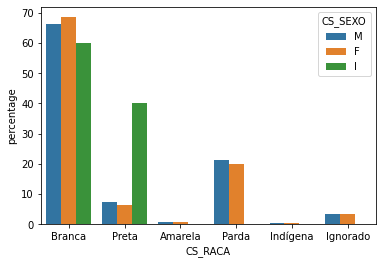

In [68]:
teste = (dados.groupby('CS_SEXO')['CS_RACA']
 .value_counts(normalize=True).rename('percentage').mul(100)
 .reset_index().sort_values('CS_RACA'))
teste['CS_RACA'] = teste['CS_RACA'].map({1:'Branca',2:'Preta',3:'Amarela',
                                             4:'Parda',5:'Indígena',9:'Ignorado'})
sns.barplot(data=teste, x='CS_RACA', y='percentage', hue='CS_SEXO')

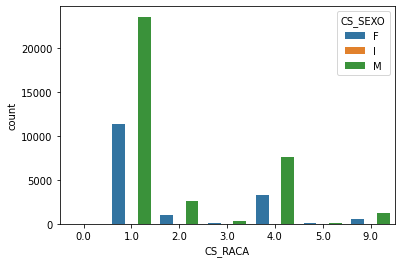

In [56]:
sns.countplot(data=dados, x='CS_RACA',  hue='CS_SEXO')

# plt.legend(loc=(1.1,0.8))

# plt.xticks(homens['CS_RACA'], rotation=90)
# plt.show()